In [ ]:
## Denoise Moon landing image
import numpy as np
from scipy import stats,fftpack
import matplotlib.pyplot as plt
import pylab
img=pylab.imread('moonlanding.png')
time_step = 0.2
period = 5

print("Initial image\n")
plt.imshow(img)
plt.show()
n=img[0].size
m=int(img.size/n)
sample_freq = fftpack.fftfreq(n, d=time_step)
sig_fft = fftpack.fft2(img)
pidxs = np.where(sample_freq> 0)
freqs= sample_freq[pidxs]
power= np.abs(sig_fft[0])[pidxs]
freq= freqs[power.argmax()]
for i in range(m):
    sig_fft[i][np.abs(sample_freq) > freq] = 0

main_sig = fftpack.ifft2(sig_fft, axes=(0, 1)).real
main_sig = np.clip(main_sig, 0, 1)


time_vec = np.linspace(0,20, n)
x = np.linspace(-2, 2)
print(time_vec.size)
import pylab as pl

pl.figure()
pl.plot(freqs, power)
pl.xlabel('Frequency [Hz]')
pl.ylabel('power')
pl.title('Визуализация спектра')
pl.show()
axes = pl.axes([0.3, 0.3, 0.5, 0.5])
pl.title('Peak frequency')
pl.plot(freqs[:8], power[:8])
pl.setp(axes, yticks=[])
pl.show()

print("Final Image")
plt.imshow(main_sig)
plt.show()

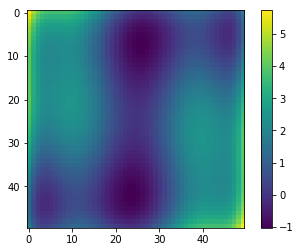

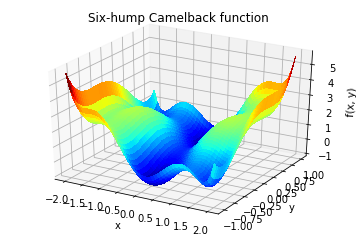

Optimization terminated successfully.
         Current function value: -1.031628
         Iterations: 7
         Function evaluations: 40
         Gradient evaluations: 10
[ 0.08984186 -0.71265649]
Optimization terminated successfully.
         Current function value: -1.031628
         Iterations: 7
         Function evaluations: 40
         Gradient evaluations: 10
[-0.08984187  0.71265648]
Optimization terminated successfully.
         Current function value: -0.215464
         Iterations: 6
         Function evaluations: 32
         Gradient evaluations: 8
[ 1.70360664 -0.79608375]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 4
         Gradient evaluations: 1
[0 0]


In [9]:
#2-D minimization
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def sixhump(x):
    return (4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1] + (-4 + \
        4*x[1]**2) * x[1] **2

x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)

plt.figure()
plt.imshow(sixhump([xg, yg]))
plt.colorbar()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, sixhump([xg, yg]), rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')
plt.show()

guess=[1,0]#поиск первого глобального минимума
print(optimize.fmin_bfgs(sixhump,guess))
guess=[-1,0]#поиск второго глобального минимума
print(optimize.fmin_bfgs(sixhump,guess))
guess=[1.75,-0.75]#поиск третьего минимума, но уже локальный
print(optimize.fmin_bfgs(sixhump,guess))
guess=[0,0]#при таких начальных условиях достигает локального минимума
print(optimize.fmin_bfgs(sixhump,guess))

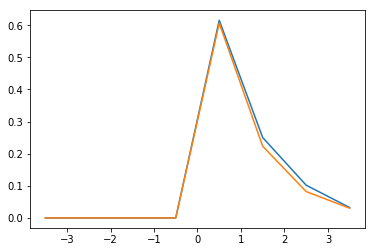

In [12]:
#Probability distributions
from scipy import stats
from scipy.stats import gamma
import numpy as np
import pylab as pl
a=1
r = gamma.rvs(a, size=1000)
bins = np.arange(-4, 5)
histogram = np.histogram(r, bins=bins, normed=True)[0]
bins = 0.5*(bins[1:] + bins[:-1])
b = stats.gamma.pdf(bins,a)
pl.plot(bins, histogram)
pl.plot(bins, b)
pl.show()

In [14]:
#Image filtering
import numpy as np
from scipy import stats,fftpack
import matplotlib.pyplot as plt
import pylab
from scipy import ndimage

lena=pylab.imread('lena2.png')
n=lena[0].size
m=int(lena.size/n)
noisy_lena = np.copy(lena).astype(np.float)
noisy_lena += lena.std()*0.5*np.random.standard_normal(lena.shape)
blurred_lena = ndimage.gaussian_filter(noisy_lena, sigma=3)
median_lena = ndimage.median_filter(blurred_lena, size=5)
from scipy import signal
wiener_lena = signal.wiener(blurred_lena, (5,5))

fig, ax = plt.subplots(1, 1)
ax.hist(np.mean(noisy_lena,0), density=True, histtype='stepfilled', alpha=0.6)
ax.set_title('histogram of noisy lena')
plt.show()

fig, ax = plt.subplots(1, 1)
ax.hist(np.mean(blurred_lena,0), density=True, histtype='stepfilled', alpha=0.6)
ax.set_title('histogram of Gaussian filter')
plt.show()

fig, ax = plt.subplots(1, 1)
ax.hist(np.mean(median_lena,0), density=True, histtype='stepfilled', alpha=0.6)
ax.set_title('histogram of median filter')
plt.show()

fig, ax = plt.subplots(1, 1)
ax.hist(np.mean(wiener_lena,0), density=True, histtype='stepfilled', alpha=0.6)
ax.set_title('histogram of Wiener filter')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'lena2.png'

In [15]:
#Mathematical morphology
#Check that opening amounts to eroding, then dilating

a=np.zeros((7,7),dtype=np.int)
a[1:6,2:5]=1; a[6,5]=1

print("Matrix A")
print(a)
print("\nMatrix A after erosion")
b=ndimage.binary_erosion(a).astype(a.dtype)
print(b)
print("\nMatrix A after erosion and dilation")
b=ndimage.binary_dilation(b).astype(a.dtype)
print(b)
print("\nMatrix A after opening")
print(ndimage.binary_opening(a).astype(np.int))

Matrix A
[[0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 0 0 0 1 0]]

Matrix A after erosion
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]

Matrix A after erosion and dilation
[[0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0]]

Matrix A after opening
[[0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0]]


In [16]:
#Mathematical morphology
#Check that the area of the reconstructed square 
#is smaller than the area of the initial square
a = np.zeros((50, 50))
a[10:-10, 10:-10] = 1
initialSquare=int(np.sum(a))
a += 0.25*np.random.standard_normal(a.shape)
mask = a>=0.5
opened_mask = ndimage.binary_opening(mask)
closed_mask = ndimage.binary_closing(opened_mask)


reconstructedSquare=np.sum(closed_mask)
print("Area of the reconstructed square "+str(reconstructedSquare))
print("Area of the initial square "+str(initialSquare))

Area of the reconstructed square 890
Area of the initial square 900


График температур


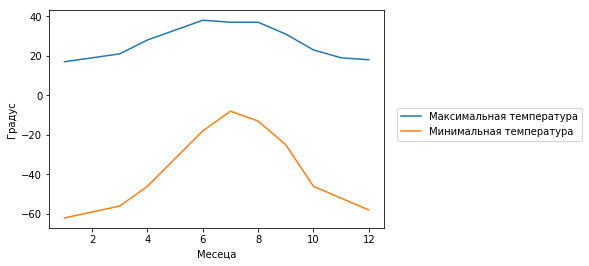

In [17]:
import matplotlib.pyplot as plt
import numpy as np
data = np.loadtxt('text.txt')
month=np.linspace(1,12,num=12)
tempMax,tempMin=data.T
print("График температур")
plt.plot(month,tempMax)
plt.plot(month,tempMin)
plt.legend(('Максимальная температура', 'Минимальная температура'), loc=(1.04, 0.4))
plt.xlabel(u'Месяца')
plt.ylabel(u'Градус')
plt.show()